<a href="https://colab.research.google.com/github/yunadla/MaritimeDataMining/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1200x600 with 0 Axes>

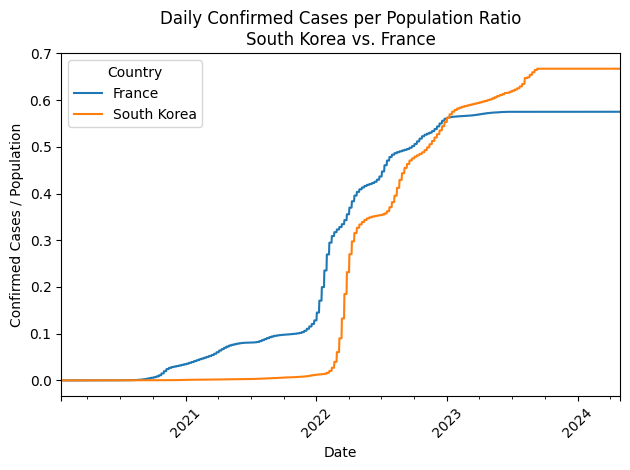

In [3]:

# 1. 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 2. 데이터 로드
# 파일 경로는 Drive 경로 또는 Colab에 업로드한 경로로 바꿔주세요.
file_path = '/content/owid-covid-data.csv'
df = pd.read_csv(file_path)

# 3. 대상 국가 필터링
countries = ['South Korea', 'France']
df = df[df['location'].isin(countries)].copy()

# 4. 날짜(datetime) 변환 및 인덱스 설정
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 5. 총 확진자(total_cases)와 인구(population) 비율 계산
df['cases_per_pop'] = df['total_cases'] / df['population']

# 6. 각 국가별로 피벗
ratio_df = df.pivot_table(
    values='cases_per_pop',
    index=df.index,
    columns='location'
)

# 7. 그래프 그리기
plt.figure(figsize=(12, 6))
ratio_df.plot.line(rot=45)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases / Population')
plt.title('Daily Confirmed Cases per Population Ratio\nSouth Korea vs. France')
plt.legend(title='Country')
plt.tight_layout()
plt.show()
